<a href="https://colab.research.google.com/github/BryanYuen0205/COMP4211_Kaggle_Comp/blob/main/COMP4211KaggleComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Setting up environment
!python --version
!pip show torch tensorflow scikit-learn
!pip install --upgrade "tensorflow>=2.18"
!pip install "scikit-learn>=1.4.1"
!pip install kaggle


Python 3.11.12
Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
---
Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
# To safely store your training progress, use Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# To upload kaggle.json file
from google.colab import files
files.upload()


{}

In [30]:
# Creating a kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [32]:
# Downloading the kaggle competition dataset
!kaggle competitions download -c comp-4211-spring-25-project

In [33]:
!unzip -q comp-4211-spring-25-project.zip -d ./data

In [35]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# View first few rows
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())


Train Data:


,id,Sentence,NER Tag
0,0,"['Thousands', 'of', 'demonstrators', 'have', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,1,"['Iranian', 'officials', 'say', 'they', 'expec...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."


Test Data:


,id,Sentence
0,0,"['Pakistani', 'officials', 'say', 'unidentifie..."
1,1,"['China', ""'s"", 'official', 'Xinhua', 'news', ..."
2,2,"['News', 'reports', 'say', 'since', '1998', ',..."
3,3,"['French', 'tennis', 'great', 'Mary', 'Pierce'..."
4,4,"['Now', 'ranked', '29th', 'in', 'the', 'world'..."


# Understanding the dataset
---



In [48]:
# Checking if dataset contains any null values
print(train_df.isnull().sum())

# Getting some basic statistics about the dataset
print(f"Total examples: {len(train_df)}")

id          0
Sentence    0
NER Tag     0
dtype: int64
Total examples: 40000


In [53]:
import ast

# Convert string representations of lists to actual lists
train_df["NER Tag"] = train_df["NER Tag"].apply(ast.literal_eval)

# Display the unique NER Tags
all_tags = [tag for sublist in train_df["NER Tag"] for tag in sublist]
unique_tags = sorted(set(all_tags))
print("Unique NER Tags:", unique_tags)

Unique NER Tags: ['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org', 'I-per', 'I-tim', 'O']


In [65]:
# Count the number of tag frequencies
from collections import Counter


tag_counts = Counter(all_tags)
frequency_dict = dict(tag_counts)
print("All Tag Frequencies:", frequency_dict)

All Tag Frequencies: {'O': 741576, 'B-geo': 31368, 'B-gpe': 13080, 'B-tim': 16982, 'B-org': 16825, 'I-geo': 6154, 'B-per': 14204, 'I-per': 14456, 'I-org': 14138, 'I-tim': 5510, 'B-art': 333, 'I-art': 257, 'B-nat': 170, 'I-gpe': 160, 'I-nat': 35, 'B-eve': 250, 'I-eve': 211}


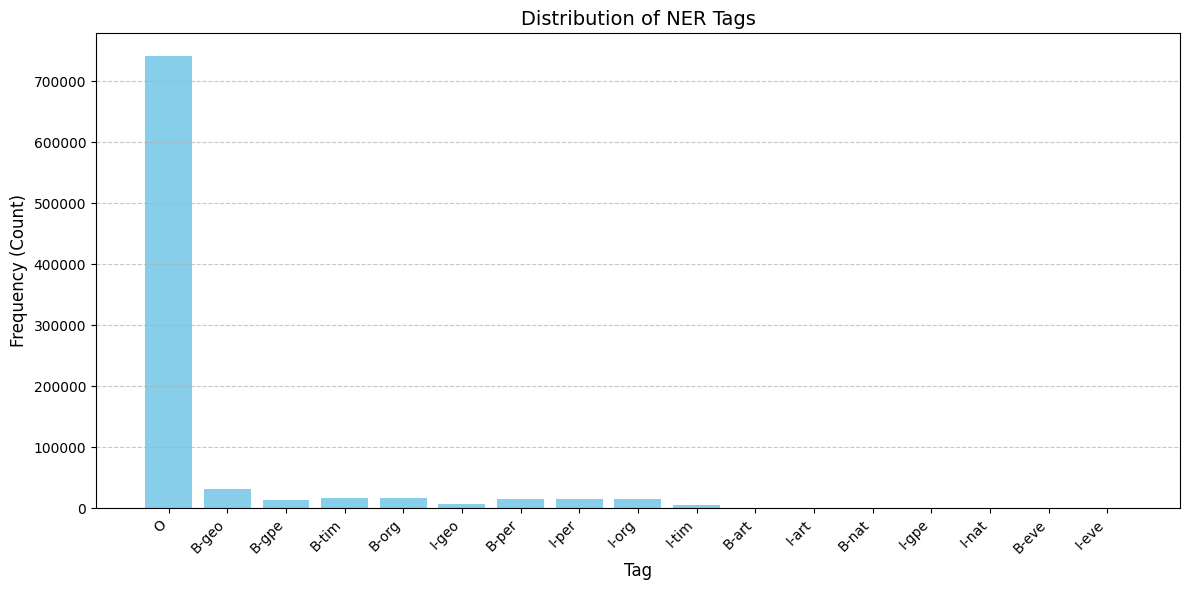

In [68]:
import matplotlib.pyplot as plt

tags = frequency_dict.keys()
tag_freq = frequency_dict.values()

plt.figure(figsize=(12, 6))
plt.bar(tags, tag_freq, color='skyblue')

# Customize the plot
plt.title('Distribution of NER Tags', fontsize=14)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Prevents label cutoff
plt.show()